
**Student Name:** Joseph Sam

**Student Id:** 22301411

**Student Name:** Anju Paul

**Student Id:** 22301314


# **Objective**

Identifying suitable datasets for image classification
Either using Roboflow or Kaggle, need to identify the best dataset with a minimum of 2 categories and at least 1000 images. Using the dataset, the training will be performed using transfer learning Mobilenet v2 and the model trained to get the best accuracy.

In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Data Description




1.   Classes : Car,Bike
2.   Image count Car : 2000
3.   Image count Bike : 2000



Data set URL: https://www.kaggle.com/datasets/utkarshsaxenadn/car-vs-bike-classification-dataset

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anjupaulhazielmary","key":"b8632606ae02ff3afea2f0e24f635be6"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d utkarshsaxenadn/car-vs-bike-classification-dataset

 95% 98.0M/103M [00:03<00:00, 37.6MB/s]
100% 103M/103M [00:03<00:00, 27.9MB/s] 


In [6]:
!unzip car-vs-bike-classification-dataset.zip

Archive:  car-vs-bike-classification-dataset.zip
  inflating: Car-Bike-Dataset/Bike/Bike (1).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1).jpg  
  inflating: Car-Bike-Dataset/Bike/Bike (1).png  
  inflating: Car-Bike-Dataset/Bike/Bike (10).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (10).jpg  
  inflating: Car-Bike-Dataset/Bike/Bike (10).png  
  inflating: Car-Bike-Dataset/Bike/Bike (100).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (100).jpg  
  inflating: Car-Bike-Dataset/Bike/Bike (1000).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1001).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1002).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1003).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1004).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1005).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1006).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1007).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1008).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1009).jpeg  
 

In [7]:
!rm -r /content/images

rm: cannot remove '/content/images': No such file or directory


In [8]:
import os

# Set destination directories
destination_train_car = '/content/images/train/Car'
destination_valid_car = '/content/images/valid/Car'
destination_test_car = '/content/images/test/Car'

destination_train_bike = '/content/images/train/Bike'
destination_valid_bike = '/content/images/valid/Bike'
destination_test_bike = '/content/images/test/Bike'

# Create destination directories if they don't exist
os.makedirs(destination_train_car, exist_ok=True)
os.makedirs(destination_valid_car, exist_ok=True)
os.makedirs(destination_test_car, exist_ok=True)

os.makedirs(destination_train_bike, exist_ok=True)
os.makedirs(destination_valid_bike, exist_ok=True)
os.makedirs(destination_test_bike, exist_ok=True)



In [9]:
from sklearn.model_selection import train_test_split
import shutil


source_car = '/content/Car-Bike-Dataset/Car'
source_bike = '/content/Car-Bike-Dataset/Bike'


def split_and_copy_images(source_directory, destination_train, destination_valid, destination_test, ratios):
    images = os.listdir(source_directory)
    train_images, test_valid_images = train_test_split(images, test_size=ratios[2], random_state=42)
    valid_images, test_images = train_test_split(test_valid_images, test_size=ratios[1] / (ratios[1] + ratios[2]), random_state=42)

    for image_name in train_images:
        source_path = os.path.join(source_directory, image_name)
        destination_path = os.path.join(destination_train, image_name)
        shutil.copy(source_path, destination_path)

    for image_name in valid_images:
        source_path = os.path.join(source_directory, image_name)
        destination_path = os.path.join(destination_valid, image_name)
        shutil.copy(source_path, destination_path)

    for image_name in test_images:
        source_path = os.path.join(source_directory, image_name)
        destination_path = os.path.join(destination_test, image_name)
        shutil.copy(source_path, destination_path)

# Split and copy Car images
split_and_copy_images(source_car, destination_train_car, destination_valid_car, destination_test_car, (0.8, 0.1, 0.2))

# Split and copy Bike images
split_and_copy_images(source_bike, destination_train_bike, destination_valid_bike, destination_test_bike, (0.8, 0.1, 0.2))



In [10]:
from PIL import Image
import os

def convert_webp_to_jpeg(image_path):
    try:
        img = Image.open(image_path)
        if img.format == 'WEBP':
            new_image_path = os.path.splitext(image_path)[0] + '.jpg'
            img.convert('RGB').save(new_image_path, 'JPEG')
            print(f"Converted: {image_path} to {new_image_path}")
    except Exception as e:
        print(f"Error converting {image_path}: {e}")


webp_image_paths = ['/content/images/train/Car/Car (2).jpg', '/content/images/train/Bike/Bike (136).jpg']

for image_path in webp_image_paths:
    convert_webp_to_jpeg(image_path)

Converted: /content/images/train/Car/Car (2).jpg to /content/images/train/Car/Car (2).jpg
Converted: /content/images/train/Bike/Bike (136).jpg to /content/images/train/Bike/Bike (136).jpg


In [11]:

train_count_car = len(os.listdir(destination_train_car))
valid_count_car = len(os.listdir(destination_valid_car))
test_count_car = len(os.listdir(destination_test_car))

train_count_bike = len(os.listdir(destination_train_bike))
valid_count_bike = len(os.listdir(destination_valid_bike))
test_count_bike = len(os.listdir(destination_test_bike))

print("Train images count (Car):", train_count_car)
print("Validation images count (Car):", valid_count_car)
print("Test images count (Car):", test_count_car)

print("Train images count (Bike):", train_count_bike)
print("Validation images count (Bike):", valid_count_bike)
print("Test images count (Bike):", test_count_bike)

Train images count (Car): 1600
Validation images count (Car): 266
Test images count (Car): 134
Train images count (Bike): 1600
Validation images count (Bike): 266
Test images count (Bike): 134


In [12]:
import tensorflow_datasets as tfds

# Provide the path to your 'images/' directory
builder = tfds.folder_dataset.ImageFolder('/content/images/')
print(builder.info)
raw_train = builder.as_dataset(split='train', shuffle_files=True)
raw_test = builder.as_dataset(split='test', shuffle_files=True)
raw_valid = builder.as_dataset(split='valid', shuffle_files=True)

tfds.core.DatasetInfo(
    name='image_folder',
    full_name='image_folder/1.0.0',
    description="""
    Generic image classification dataset.
    """,
    homepage='https://www.tensorflow.org/datasets/catalog/image_folder',
    data_path='/root/tensorflow_datasets/image_folder/1.0.0',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=268, num_shards=1>,
        'train': <SplitInfo num_examples=3200, num_shards=1>,
        'valid': <SplitInfo num_examples=532, num_shards=1>,
    },
    citation="""""",
)


In [13]:
print ("Train images in total are: " + str(len(raw_train)))

Train images in total are: 3200


# Ratio of images in tran, valid, test folders


In [14]:
train_count_car = len(os.listdir(destination_train_car))
valid_count_car = len(os.listdir(destination_valid_car))
test_count_car = len(os.listdir(destination_test_car))

Total_count_car=train_count_car+valid_count_car+test_count_car


train_count_bike = len(os.listdir(destination_train_bike))
valid_count_bike = len(os.listdir(destination_valid_bike))
test_count_bike = len(os.listdir(destination_test_bike))

Total_count_bike=train_count_bike+valid_count_bike+test_count_bike


data = [
    ("Car", Total_count_car, train_count_car, valid_count_car, test_count_car),
    ("bike", Total_count_bike, train_count_bike, valid_count_bike, test_count_bike),
]

print("Category\tTotal\tTrain and %\tValid and %\tTest and %")
for class_name, total, train, valid, test in data:
    percent_train = (train / total) * 100
    percent_valid = (valid / total) * 100
    percent_test = (test / total) * 100
    print(f"{class_name}\t\t{total}\t{train}\t{percent_train:.2f}%\t{valid}\t{percent_valid:.2f}%\t{test}\t{percent_test:.2f}%")

Category	Total	Train and %	Valid and %	Test and %
Car		2000	1600	80.00%	266	13.30%	134	6.70%
bike		2000	1600	80.00%	266	13.30%	134	6.70%


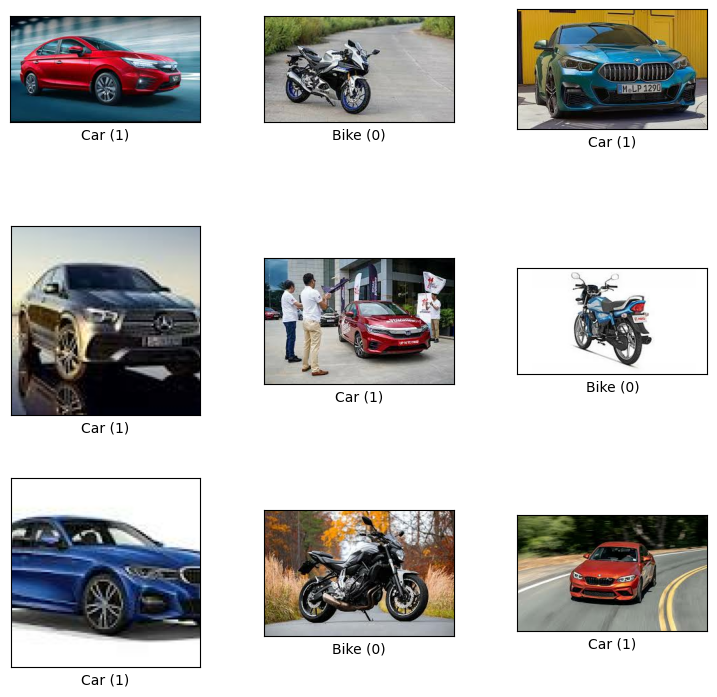

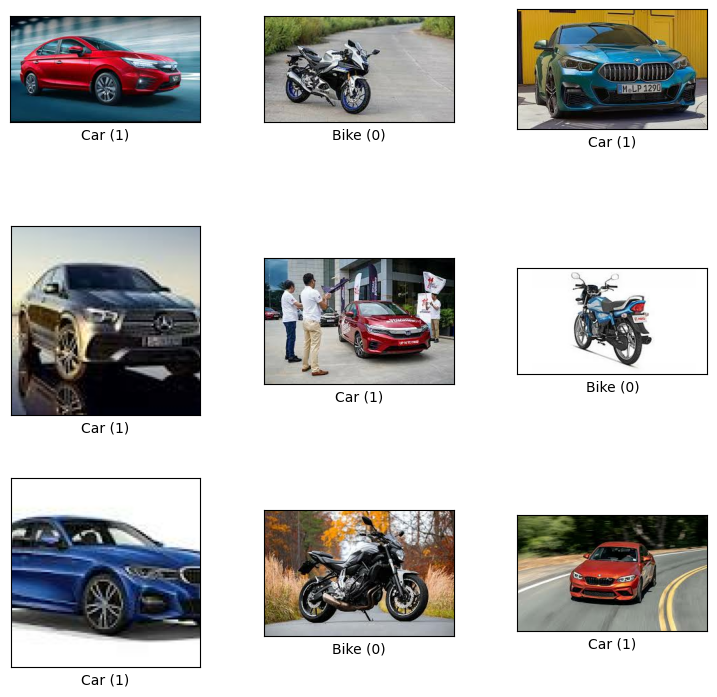

In [15]:
tfds.show_examples(raw_train, builder.info)

In [16]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(pair):
  image, label = pair['image'], pair['label']
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [17]:
train = raw_train.map(format_example)
validation = raw_valid.map(format_example)
test = raw_test.map(format_example)

In [18]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

In [19]:
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [20]:
for image_batch, label_batch in train_batches.take(1):
   pass

image_batch.shape

TensorShape([32, 160, 160, 3])

In [21]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 1s 0us/step


In [22]:
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [23]:
base_model.trainable = False

In [24]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [25]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [26]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [27]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [28]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [30]:
len(model.trainable_variables)

2

In [31]:
initial_epochs = 20
validation_steps=20

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

17/20 [========================>.....] - ETA: 0s - loss: 1.1659 - accuracy: 0.3120

20/20 [==============================] - 5s 93ms/step - loss: 1.1659 - accuracy: 0.3120


In [32]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 1.17
initial accuracy: 0.31


In [33]:
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

Epoch 1/20
100/100 [==============================] - 15s 78ms/step - loss: 0.6979 - accuracy: 0.5647 - val_loss: 0.4269 - val_accuracy: 0.7876
Epoch 2/20
100/100 [==============================] - 10s 79ms/step - loss: 0.2727 - accuracy: 0.9291 - val_loss: 0.1823 - val_accuracy: 0.9662
Epoch 3/20
100/100 [==============================] - 14s 99ms/step - loss: 0.1278 - accuracy: 0.9775 - val_loss: 0.1000 - val_accuracy: 0.9850
Epoch 4/20
100/100 [==============================] - 15s 123ms/step - loss: 0.0777 - accuracy: 0.9812 - val_loss: 0.0688 - val_accuracy: 0.9868
Epoch 5/20
100/100 [==============================] - 15s 114ms/step - loss: 0.0566 - accuracy: 0.9837 - val_loss: 0.0554 - val_accuracy: 0.9887
Epoch 6/20
100/100 [==============================] - 12s 85ms/step - loss: 0.0461 - accuracy: 0.9853 - val_loss: 0.0456 - val_accuracy: 0.9887
Epoch 7/20
100/100 [==============================] - 12s 96ms/step - loss: 0.0395 - accuracy: 0.9869 - val_loss: 0.0415 - val_accurac

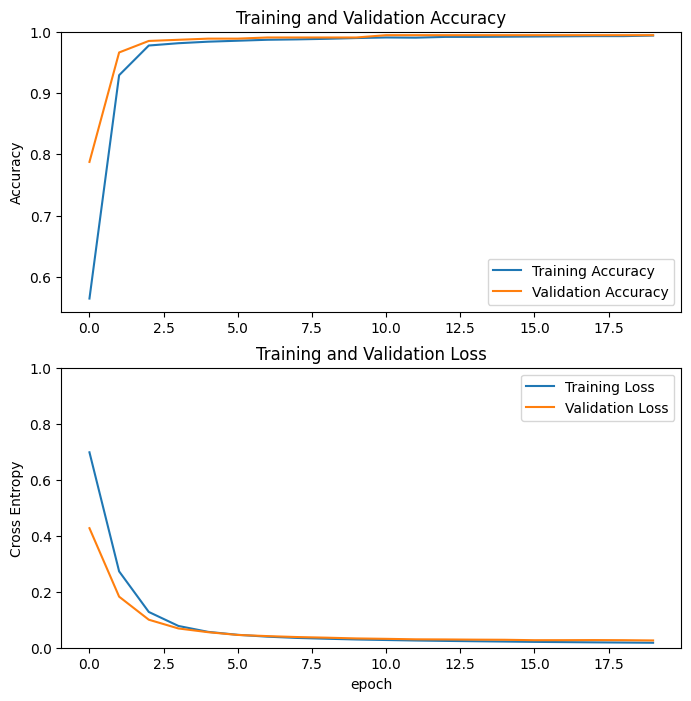

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [35]:
base_model.trainable = True

In [36]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  154


In [37]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,862,721
Non-trainable params: 396,544
_________________________________________________________________


In [39]:
len(model.trainable_variables)

56

In [40]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_batches,
                         epochs=total_epochs,
                         initial_epoch =  history.epoch[-1],
                         validation_data=validation_batches)

Epoch 20/30
100/100 [==============================] - 31s 121ms/step - loss: 0.0918 - accuracy: 0.9600 - val_loss: 0.0310 - val_accuracy: 0.9906
Epoch 21/30
100/100 [==============================] - 16s 115ms/step - loss: 0.0398 - accuracy: 0.9887 - val_loss: 0.0280 - val_accuracy: 0.9906
Epoch 22/30
100/100 [==============================] - 13s 99ms/step - loss: 0.0274 - accuracy: 0.9897 - val_loss: 0.0251 - val_accuracy: 0.9925
Epoch 23/30
100/100 [==============================] - 11s 77ms/step - loss: 0.0216 - accuracy: 0.9944 - val_loss: 0.0228 - val_accuracy: 0.9944
Epoch 24/30
100/100 [==============================] - 12s 102ms/step - loss: 0.0137 - accuracy: 0.9966 - val_loss: 0.0192 - val_accuracy: 0.9925
Epoch 25/30
100/100 [==============================] - 12s 98ms/step - loss: 0.0147 - accuracy: 0.9966 - val_loss: 0.0174 - val_accuracy: 0.9944
Epoch 26/30
100/100 [==============================] - 12s 86ms/step - loss: 0.0120 - accuracy: 0.9975 - val_loss: 0.0148 - val

In [41]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

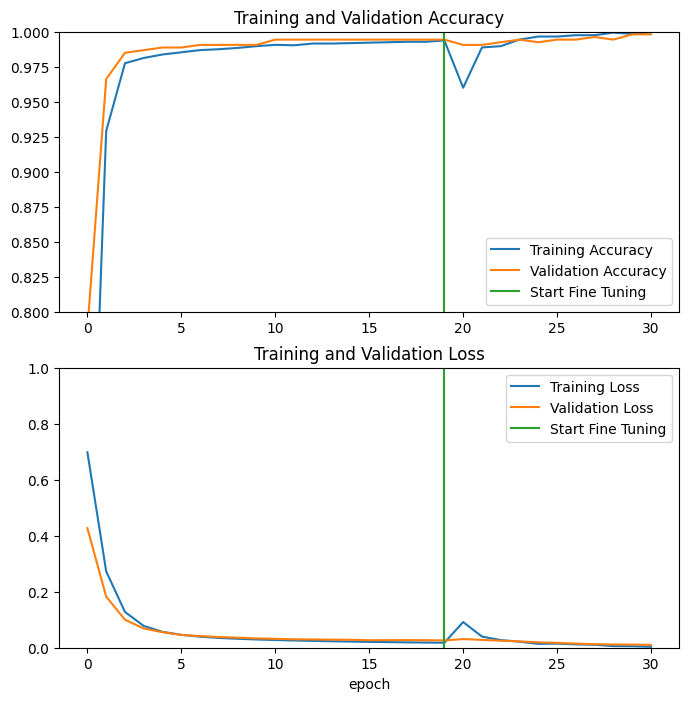

In [42]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Prediction

1/1 [==============================] - 0s 49ms/step


[[-8.225372]]
1/1 [==============================] - 0s 33ms/step


Text(0.5, 1.0, 'Bike')

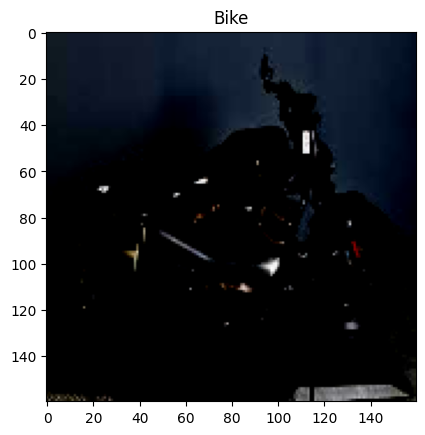

In [46]:
test_batches = test.batch(1)
for image, label in test_batches.take(1):
  pass
print(model.predict(image))
plt.imshow(np.squeeze(image))
plt.title("Car" if model.predict(image) > 0 else "Bike")

1/1 [==============================] - 0s 23ms/step


[[9.19365]]
1/1 [==============================] - 0s 22ms/step


Text(0.5, 1.0, 'Car')

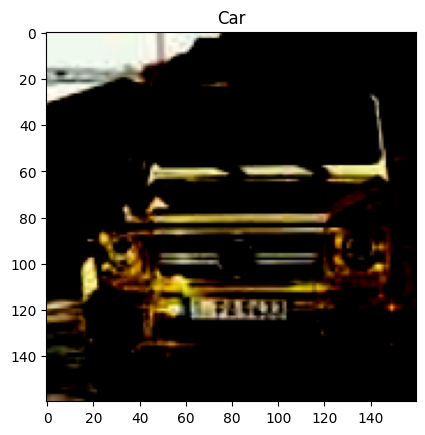

In [47]:
test_batches = test.batch(1)
for image, label in test_batches.take(1):
  pass
print(model.predict(image))
plt.imshow(np.squeeze(image))
plt.title("Car" if model.predict(image) > 0 else "Bike")

1/1 [==============================] - 1s 1s/step


[[-8.908301]]
1/1 [==============================] - 0s 28ms/step


Text(0.5, 1.0, 'Bike')

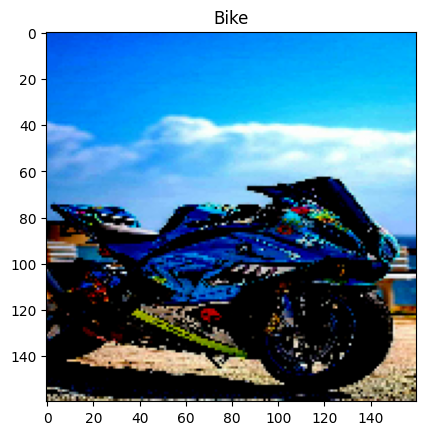

In [43]:
test_batches = test.batch(1)
for image, label in test_batches.take(1):
  pass
print(model.predict(image))
plt.imshow(np.squeeze(image))
plt.title("Car" if model.predict(image) > 0 else "Bike")

1/1 [==============================] - 0s 25ms/step


[[13.827481]]
1/1 [==============================] - 0s 39ms/step


Text(0.5, 1.0, 'Car')

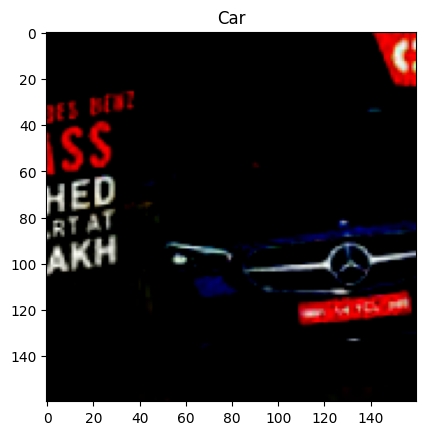

In [44]:
test_batches = test.batch(1)
for image, label in test_batches.take(1):
  pass
print(model.predict(image))
plt.imshow(np.squeeze(image))
plt.title("Car" if model.predict(image) > 0 else "Bike")

1/1 [==============================] - 0s 30ms/step
Confusion Matrix:
[[133   1]
 [  1 133]]


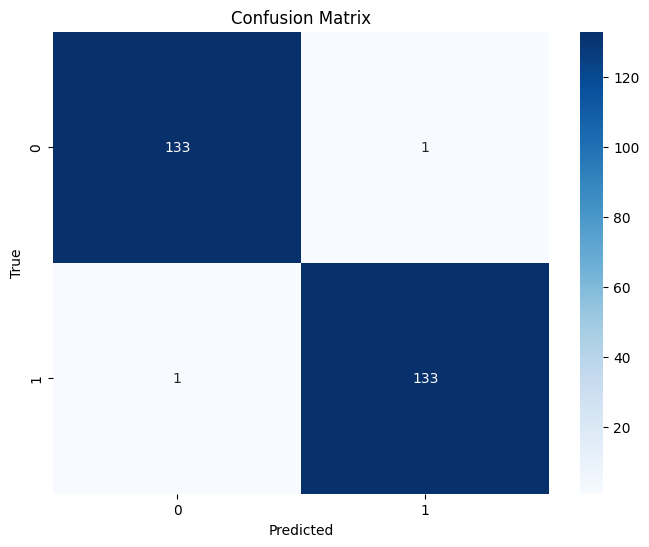

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have a "test" dataset and a trained "model"
# Modify the code to load and preprocess your test data

test_batches = test.batch(1)
true_labels = []
predicted_labels = []

for image, label in test_batches:
    true_labels.append(label.numpy()[0])  # Assuming the label is a numeric value (0 for bike, 1 for car)
    prediction = model.predict(image)
    predicted_labels.append(1 if prediction > 0 else 0)

# Convert to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# categories = ["car", "bike"]

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
